In [1]:
# reading MODIS L3 data for IWP
#   calculating histograms over multiple files/days
from pyhdf.SD import SD, SDC
from mpl_toolkits.basemap import Basemap #, cm
import numpy as np
import matplotlib.pyplot as plt
import os
#from gmap import grdmap

In [2]:
dire = '/home/dudavid/Dendrite/MODIS/'
files = os.listdir(dire)
iwpall = []
#latdex = []
#popdex = []

In [3]:
for fii in files:
    hdf = SD(dire+fii,SDC.READ)
    iw = 0.001 * hdf.select('Cloud_Water_Path_Ice_Mean')[:,:]
    iwu= 0.001 * hdf.select('Cloud_Water_Path_Ice_Mean_Uncertainty')[:,:]
    lf = 0.0001 * hdf.select('Land_Fraction_Day')[:,:]
    iwp = np.reshape(np.array(iw+iwu),np.size(iw))
    iwpu= np.reshape(np.array(iwu),np.size(iw))
    lfo = np.reshape(np.array(lf),np.size(iw))
    #print(np.shape(iw),np.shape(iwp))
    #print(max(iwpu),max(iwp))
    
    #ladex = np.zeros(np.size(lfo))
    #pop= np.reshape(np.array(f['S1/probabilityOfPrecip']),np.size(iw))
    #lat= np.reshape(np.array(f['S1/Latitude']),np.size(iw))
    #sfc= np.reshape(np.array(f['S1/surfaceTypeIndex']),np.size(iw))
    #mask = iwp>0 #sfc<=1
    mask = lfo < 0.1 #sfc<=1
    
    iwpo = iwp[mask]
    #iwpo,popo,lato = iwp[mask],pop[mask],lat[mask]
    iwpall.extend(iwpo)
    #latdex.extend(lato)
    #popdex.extend(popo)

9.86 -19.998
[    0     0     0     0     3   146  1337  8229 20856 28408 30269 28440
 24224 19309  7550  1160]


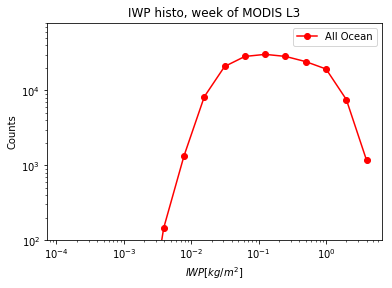

In [6]:
# create histogram of IWP
iwpa = np.array(iwpall)
#print(np.size(iwpall))
#pops = np.array(popdex)
#lats = np.array(latdex)
#binz = [0.0,.0001,.00025,.0005,0.001,.0025,.005,.01,.025,.05,.1,.25,.5,1,2]
binz = [2**x for x in range(-14,3)]
#mask1 = [x >= 30 and x <= 70 for x in abs(lats)] #abs(lats)>30 and abs(lats)<70]
#mask1 = abs(lats)>30 # can use the above to make AM2 semi-suit GMI (slower)
#mask2 = pops>=50
#mask3 = abs(lats)<=30
#mask4 = pops<20
#ip1 = iwpa[mask1]
#ip2 = iwpa[mask2]
#ip3 = iwpa[mask3]
#ip4 = iwpa[mask4]

print(iwpa.max(),iwpa.min())
hist, bin_edges  = np.histogram(iwpa,bins=binz)
print(hist)
#hist1, bin_edges = np.histogram(ip1,bins=binz)
#hist2, bin_edges = np.histogram(ip2,bins=binz)
#hist3, bin_edges = np.histogram(ip3,bins=binz)
#hist4, bin_edges = np.histogram(ip4,bins=binz)
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(binz[1:],hist,'r-o',label='All Ocean')
#plt.plot(binz[1:],hist1,'b-o',label='Lat > 30')
#plt.plot(binz[1:],hist3,'k-o',label='Lat < 30')
#plt.plot(binz[1:],hist4,'y-o',label='POP < 20%')
#plt.plot(binz[1:],hist2,'g-o',label='POP > 50%')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$IWP [kg/m^2]$')
plt.ylabel('Counts')
plt.title('IWP histo, '+'week of MODIS L3')#dire)
plt.ylim(1e2,8e4)
plt.legend()
fig.savefig('modisl3.week.png',dpi=300)
plt.show()

In [5]:
#hist2

#fig = plt.figure(figsize=[20,25])
#m = Basemap(projection='cyl',lon_0=0)#,lat_0=0,resolution='l')
#lons, lats = m.makegrid(1440,720)
#x, y = m(lons, lats)
#m.drawcoastlines()
#clevs = [.001,0.004,.007,0.01,.02,.05,.075,.1,.25,.5,.75,1.0,2.0]
#cs = m.contourf(x,y,iwp,clevs,latlon=1,cmap=cm.s3pcpn)
#cbar = m.colorbar(cs,location='bottom')
#plt.show()